In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(['id'],axis=1,inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [5]:
df.drop(df.columns[-1],axis=1,inplace=True)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
df[['diagnosis']] = df[['diagnosis']].replace(to_replace={'M':1,'B':0})

In [9]:
X=df.iloc[:,1:31]
y=df.iloc[:,0]

In [10]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.fit_transform(X_test)

In [15]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

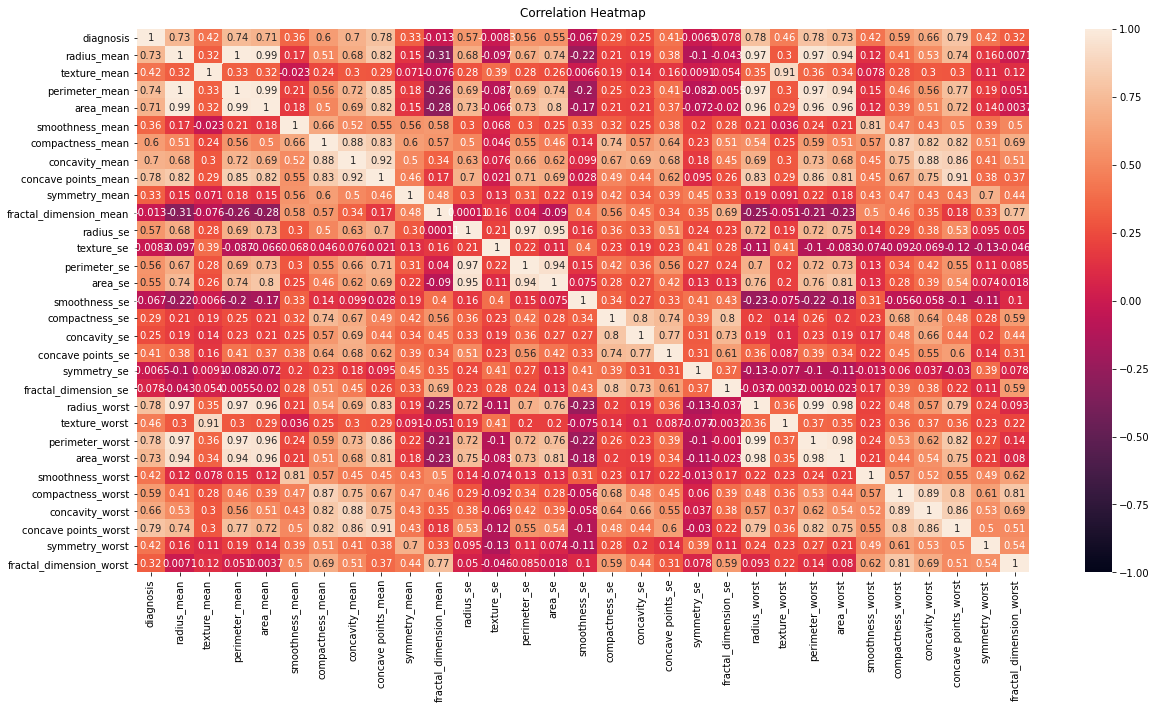

In [16]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [17]:
def correlationf(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
correlationf(X_train,0.9)

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [20]:
pca.fit(X_train)

PCA(n_components=2)

In [21]:
x_pca=pca.transform(X_train)

In [22]:
x_pca.shape

(398, 2)

In [23]:
x_pca

array([[-1.73142266e+02,  1.81629974e+01],
       [-2.69896445e+02,  4.06285642e+01],
       [-6.24963255e+01,  3.58756087e+01],
       [-3.16150759e+02,  2.56314740e+01],
       [-1.75427454e+02,  6.21432177e+00],
       [ 4.30052065e+02,  5.54379692e+01],
       [-5.02190003e+01,  5.95794164e+01],
       [-3.93054394e+02, -2.58087230e+01],
       [-1.21087275e+02,  5.61942188e+01],
       [-2.00391435e+02,  1.90723521e+01],
       [-4.45145422e+02, -3.21929946e+01],
       [-7.36364997e+02, -5.12365064e+01],
       [ 3.81434534e+02, -5.36500538e+01],
       [ 8.28794538e+02, -2.95188324e+01],
       [-2.93044534e+01, -7.72350344e+01],
       [-6.41867891e+01,  3.51943127e+01],
       [-1.95193234e+02,  1.01326431e+01],
       [ 2.28474728e+02, -4.98943093e+01],
       [-2.77263262e+02,  8.18797171e-01],
       [ 1.33661020e+03, -2.45338692e+02],
       [-3.29662737e+02, -8.92810580e+00],
       [-3.81025116e+02,  1.36135541e+01],
       [-5.58437678e+02, -7.89266734e+00],
       [-4.

<Figure size 1440x720 with 0 Axes>

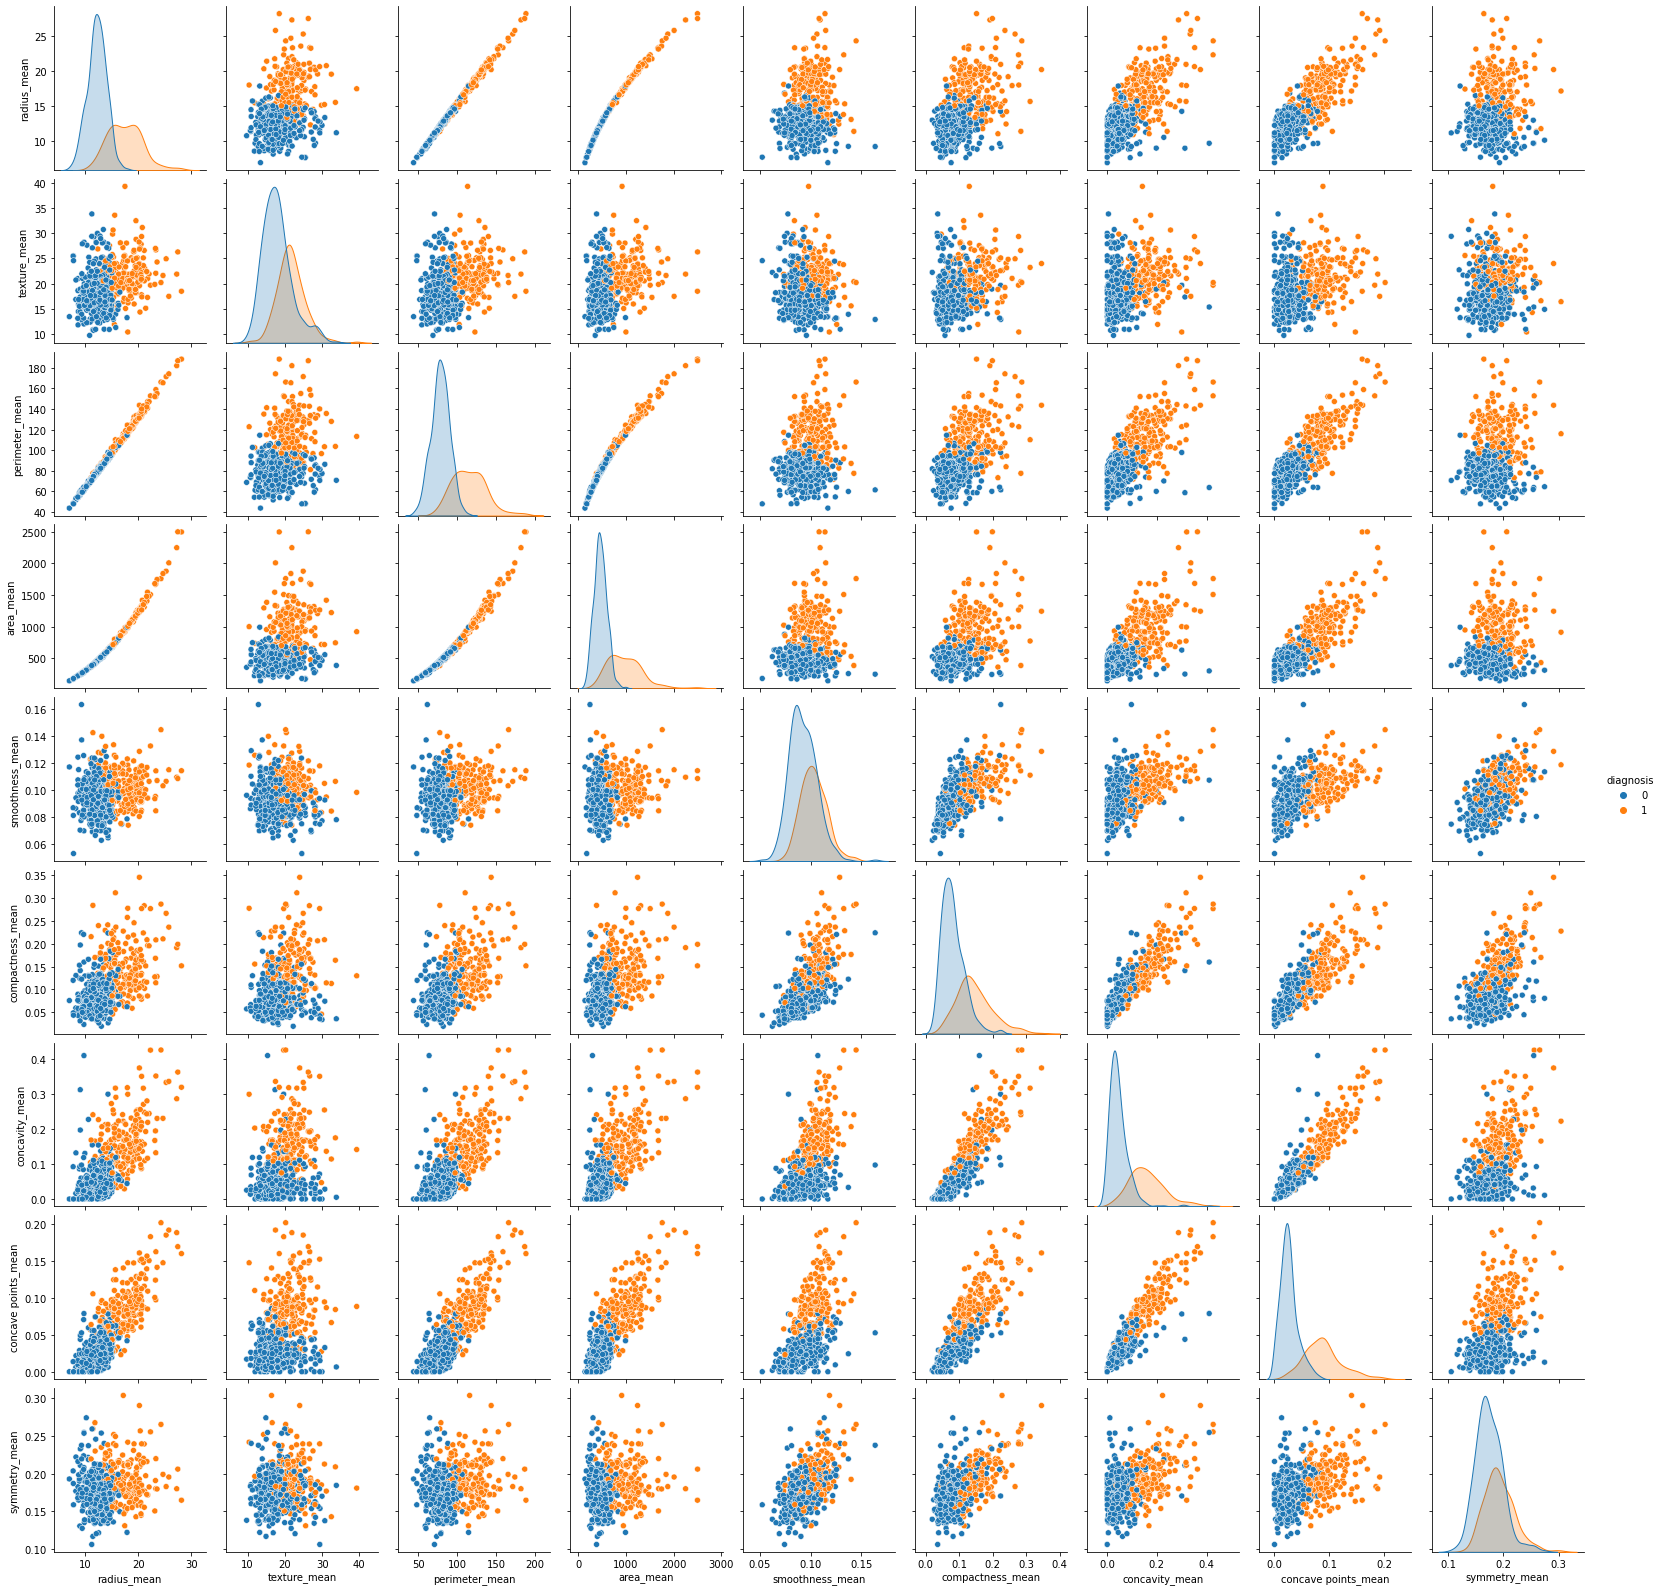

In [24]:
plt.figure(figsize=(20, 10))
sns.pairplot(df.iloc[:,0:10],hue='diagnosis')

In [26]:
x_pca[:,0].shape

(398,)

In [27]:
x_pca[:,1].shape

(398,)

In [30]:
y_train

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int64

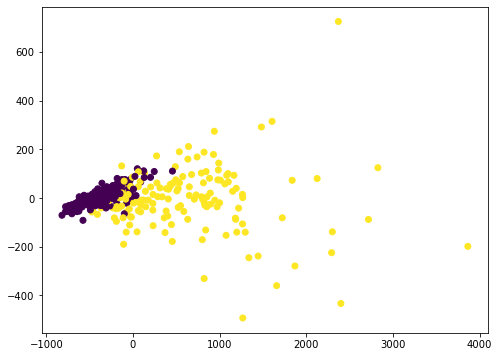

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train)

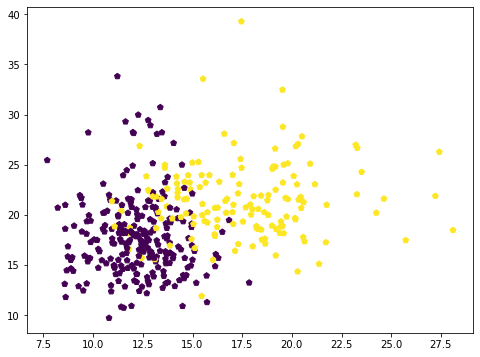

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(X_train['radius_mean'],X_train['texture_mean'],c=y_train,marker='p')

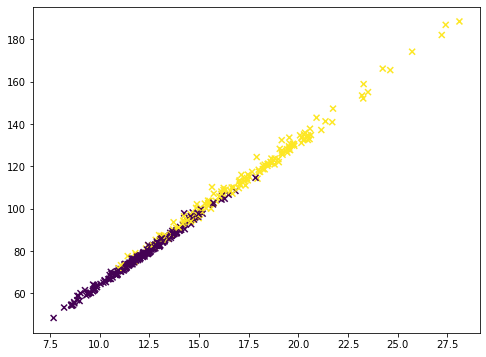

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(X_train['radius_mean'],X_train['perimeter_mean'],c=y_train,marker='x')

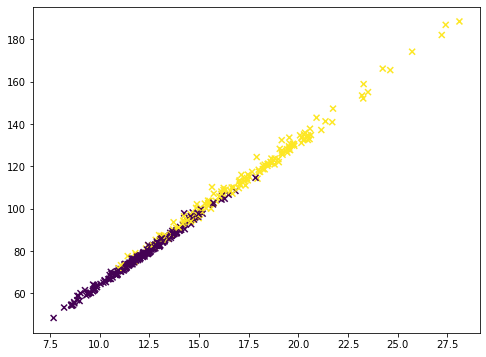

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(X_train['radius_mean'],X_train['perimeter_mean'],c=y_train,marker='x')

In [53]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k) 
    km.fit(df[['diagnosis','radius_mean']])
    sse.append(km.inertia_) 

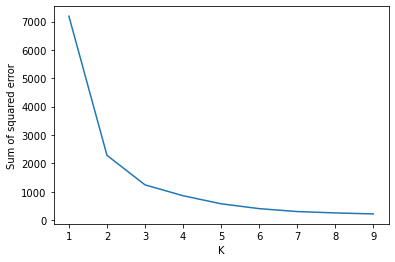

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [56]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9649122807017544

In [57]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.631578947368421

In [58]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9649122807017544

In [62]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['texture_mean','area_mean']]) 
                                                     
y_predicted  

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [63]:
km.cluster_centers_

array([[  21.84193548, 1211.93629032],
       [  18.57844944,  499.66696629]])

In [64]:
df['cluster']=y_predicted
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


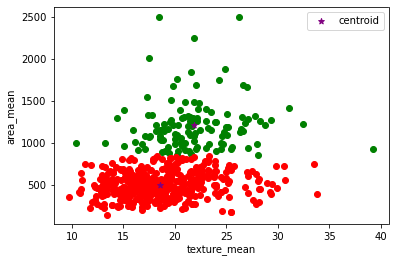

In [66]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.texture_mean,df1.area_mean,color='green')
plt.scatter(df2.texture_mean,df2.area_mean,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('texture_mean')
plt.ylabel('area_mean')
plt.legend()

In [70]:
km1 = KMeans(n_clusters=3)
y_predicted1 = km1.fit_predict(df[['texture_mean','area_mean']]) 
                                                     
y_predicted1 

array([2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1,

In [71]:
km1.cluster_centers_

array([[  18.21635258,  430.50486322],
       [  22.13619048, 1335.16666667],
       [  20.02044872,  761.80641026]])

In [72]:
df['cluster1']=y_predicted1
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster,cluster1
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,2
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


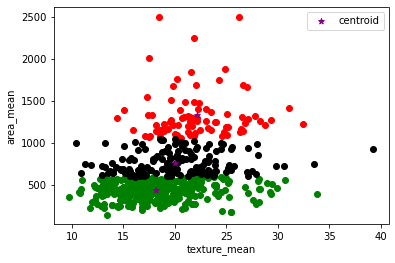

In [74]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
plt.scatter(df1.texture_mean,df1.area_mean,color='green')
plt.scatter(df2.texture_mean,df2.area_mean,color='red')
plt.scatter(df3.texture_mean,df3.area_mean,color='black')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('texture_mean')
plt.ylabel('area_mean')
plt.legend()

In [75]:
km5 = KMeans(n_clusters=5)
y_predicted5 = km5.fit_predict(df[['texture_mean','area_mean']]) 
                                                     
y_predicted5 

array([4, 0, 0, 2, 0, 1, 4, 1, 1, 1, 4, 4, 0, 4, 1, 1, 1, 4, 0, 1, 1, 2,
       1, 0, 4, 4, 1, 0, 4, 4, 0, 2, 4, 0, 4, 4, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 2, 1, 2, 4, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 4, 1, 2, 4, 1, 4, 0, 1, 2, 1, 3, 0, 2, 0, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 4, 4, 2, 0, 3, 1, 1, 1, 1, 0, 1, 0, 2, 4,
       4, 4, 0, 1, 2, 2, 1, 2, 2, 4, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 4, 4, 2, 2, 2, 0, 0, 2, 3, 1, 2, 4, 4, 1, 2, 1, 4, 2, 2, 2,
       2, 4, 1, 1, 3, 0, 4, 2, 1, 2, 4, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 4,
       0, 1, 2, 4, 3, 1, 1, 1, 2, 4, 1, 1, 0, 2, 3, 4, 1, 1, 2, 2, 0, 0,
       1, 1, 2, 4, 1, 1, 2, 1, 1, 1, 4, 2, 2, 0, 2, 1, 3, 0, 1, 4, 1, 1,
       2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 4, 0, 1, 0, 1, 4, 4, 0, 4, 4, 4,
       4, 0, 2, 1, 1, 2, 1, 2, 0, 2, 4, 2, 2, 0, 1, 1, 0, 2, 0, 4, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0,

In [76]:
km5.cluster_centers_

array([[  22.08873239, 1237.91549296],
       [  18.90029268,  581.99121951],
       [  18.03331707,  368.68682927],
       [  22.54666667, 1934.16666667],
       [  20.59947368,  876.85394737]])

In [77]:
df['cluster5']=y_predicted5
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster,cluster1,cluster5
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,2,4
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0,2
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1,0


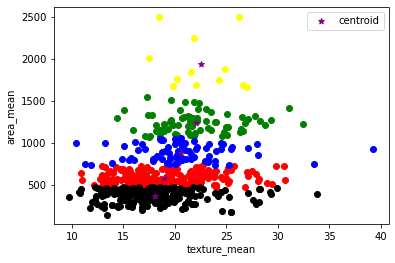

In [84]:
df1 = df[df.cluster5==0]
df2 = df[df.cluster5==1]
df3 = df[df.cluster5==2]
df4 = df[df.cluster5==3]
df5 = df[df.cluster5==4]
plt.scatter(df1.texture_mean,df1.area_mean,color='green')
plt.scatter(df2.texture_mean,df2.area_mean,color='red')
plt.scatter(df3.texture_mean,df3.area_mean,color='black')
plt.scatter(df4.texture_mean,df4.area_mean,color='yellow')
plt.scatter(df5.texture_mean,df5.area_mean,color='blue')
plt.scatter(km5.cluster_centers_[:,0],km5.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('texture_mean')
plt.ylabel('area_mean')
plt.legend()